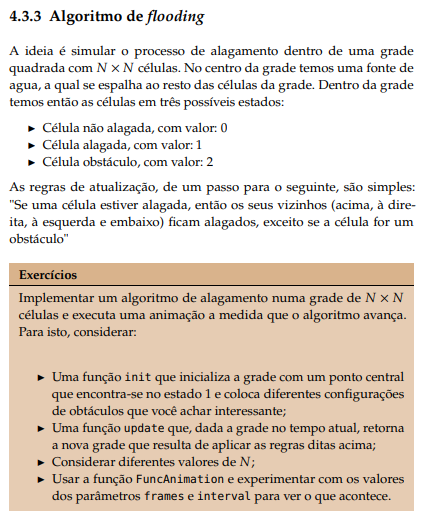

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [56]:
def init(N, prob_obs):
    grid = np.random.choice([0,2], size = (N, N), p = [1 - prob_obs, prob_obs]) #grid sem obstaculo nenhum
    grid[N // 2, N // 2] = 1  #célula inicial alagada

    return grid #retorna o grid

In [57]:
def update(frameNum, img, grid, N):
    ref_grid = np.copy(grid)

    for i in range(N):
        for j in range(N):
            if ref_grid[i][j] == 1:
                if i>0:
                    if ref_grid[i-1][j] !=2:
                        grid[i-1][j] = 1
                if j>0:
                    if ref_grid[i][j-1] !=2:
                        grid[i][j-1] = 1
                if i < N-1:
                    if ref_grid[i+1][j] !=2:
                        grid[i+1][j] = 1
                if j < N-1:
                    if ref_grid[i][j+1] !=2:
                        grid[i][j+1] = 1

    img.set_data(grid)


In [58]:
def gerar_gif(grid,N, prob_obs):

    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img,grid, N), frames = 200)

    ani.save(filename= f"./gifs/{N}-{prob_obs}.gif", writer="pillow")

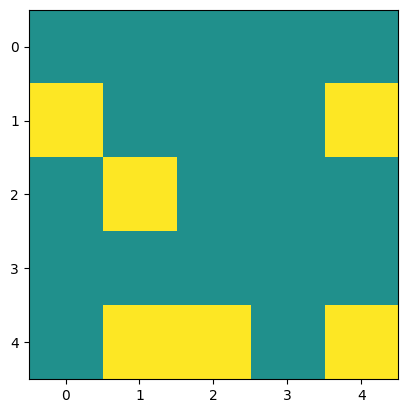

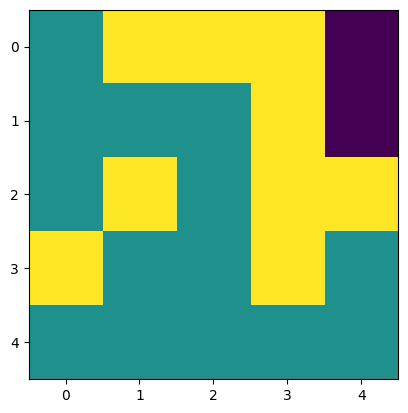

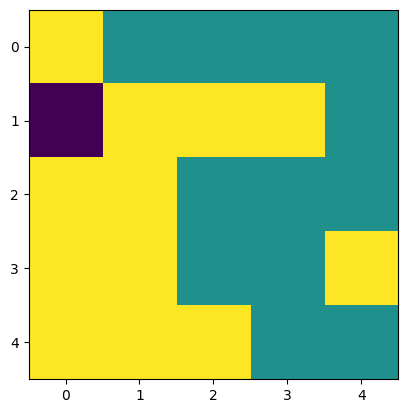

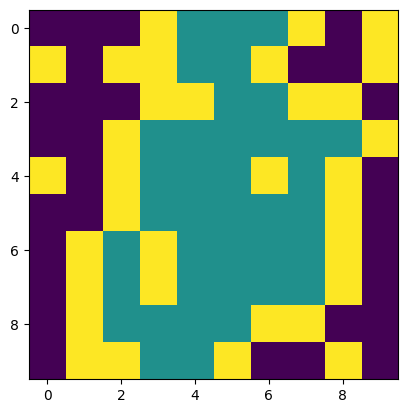

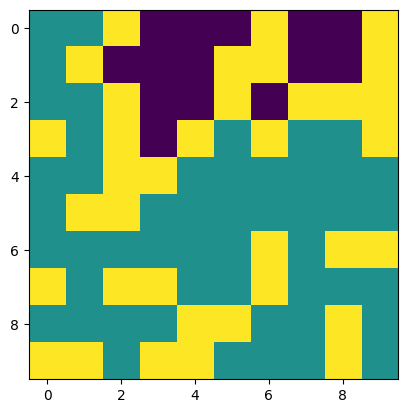

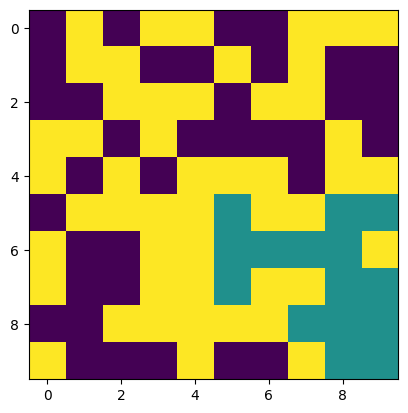

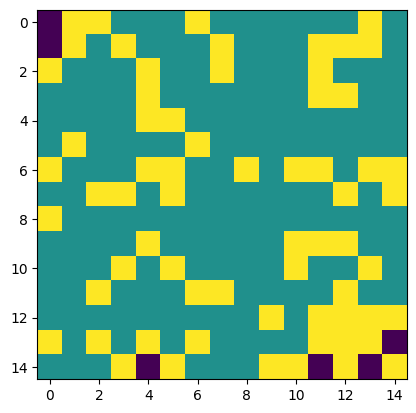

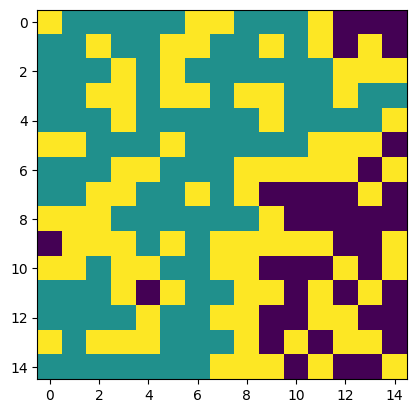

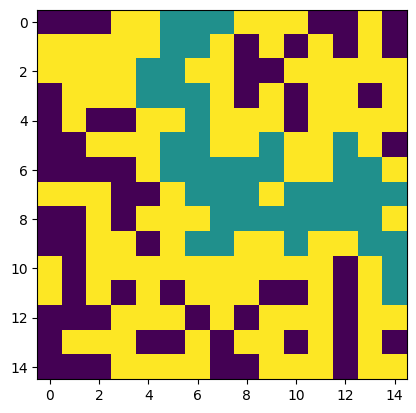

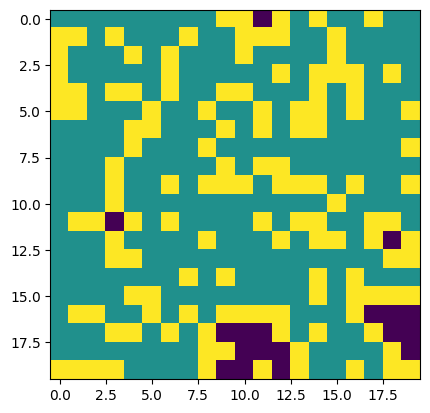

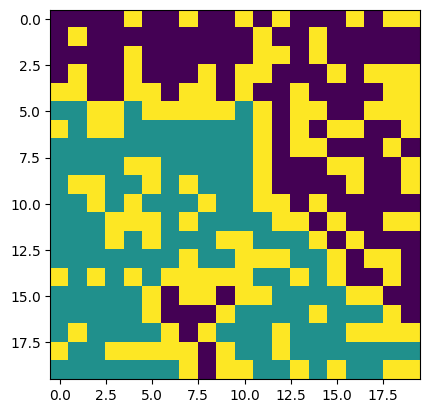

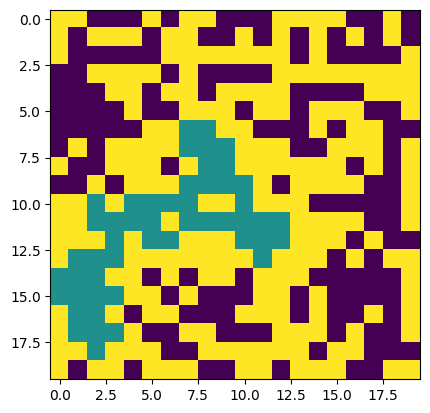

In [59]:
simulacoes = [(5, 0.30), (5, 0.40), (5, 0.50), (10, 0.30), (10, 0.40), (10, 0.50), (15, 0.30), (15, 0.40), (15, 0.50), (20, 0.30), (20, 0.40), (20, 0.50)]

for simulacao in simulacoes:
    N, prob_obs = simulacao
    grid = init(N, prob_obs)
    gerar_gif(grid, N, prob_obs)